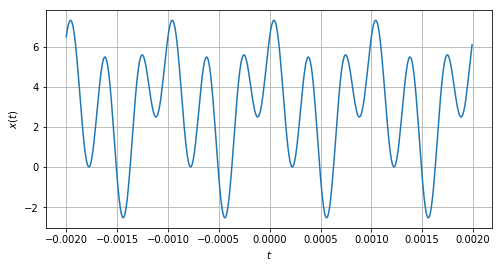

In [3]:
# -------------- Fourierova rada pro ISS --------------------------
import numpy as np
import matplotlib.pyplot as plt

# priklad kresleni FR 
om_1 = 2000*np.pi
T_1= 2*np.pi / om_1
t= np.arange(-2*T_1,2*T_1, T_1 / 100)
x = 3 + 2 * np.cos(om_1 * t) + 1 * np.cos(2*om_1 * t + np.pi/2) + 3 * np.cos(3*om_1*t - np.pi/3)
plt.figure(figsize=(8,4))
plt.plot(t,x) 
plt.gca().set_xlabel('$t$')
plt.gca().set_ylabel('$x(t)$')
plt.gca().grid()
plt.savefig('FIG/priklad.pdf')   

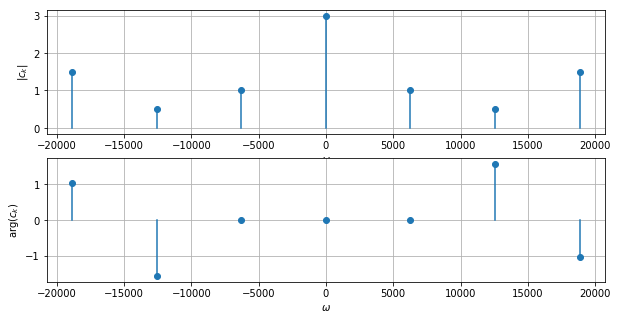

In [22]:
k = np.arange(-3,4)
i0 = 3
c = np.zeros(k.shape,dtype=np.complex_)
c[i0] = 3
c[i0+1] = 1
c[i0+2] = 0.5*np.exp(1j * np.pi/2)
c[i0+3] = 1.5*np.exp(-1j * np.pi/3)
c[i0-1] = np.conj(c[i0+1])
c[i0-2] = np.conj(c[i0+2])
c[i0-3] = np.conj(c[i0+3])
oms = k * om_1 

_, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].stem(oms,np.abs(c),basefmt=" ")  # nechci cervenou baseline ...
ax[0].set_ylabel('$|c_k|$')
#ax[0].set_xticklabels([])
ax[0].set_xlabel('$\omega$')
ax[0].grid()
ax[1].stem(oms,np.angle(c),basefmt=" ")  # nechci cervenou baseline ...
ax[1].set_ylabel('arg$(c_k)$')
#ax[1].set_xticklabels([])
ax[1].set_xlabel('$\omega$')
ax[1].grid()
plt.savefig('FIG/priklad_ck.pdf')

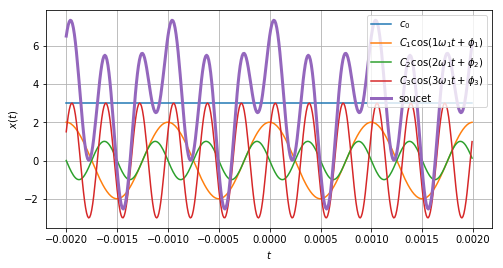

In [27]:
# synteza z tohoto ... 
x0 = np.ones(x.shape) * c[i0]
ii = 1
x1 = 2*np.abs(c[i0+ii]) * np.cos(ii * om_1 * t + np.angle(c[i0 + ii]))
ii = 2
x2 = 2*np.abs(c[i0+ii]) * np.cos(ii * om_1 * t + np.angle(c[i0 + ii]))
ii = 3
x3 = 2*np.abs(c[i0+ii]) * np.cos(ii * om_1 * t + np.angle(c[i0 + ii]))

plt.figure(figsize=(8,4))
plt.plot(t,x0,label='$c_0$') 
plt.plot(t,x1,label='$C_1 \cos(1\omega_1 t + \phi_1)$')
plt.plot(t,x2,label='$C_2 \cos(2\omega_1 t + \phi_2)$')
plt.plot(t,x3,label='$C_3 \cos(3\omega_1 t + \phi_3)$')
plt.plot(t,x0+x1+x2+x3,label='soucet',linewidth=3)

plt.gca().set_xlabel('$t$')
plt.gca().set_ylabel('$x(t)$')
plt.gca().grid()
plt.gca().legend()
plt.savefig('FIG/priklad_synt.pdf')   

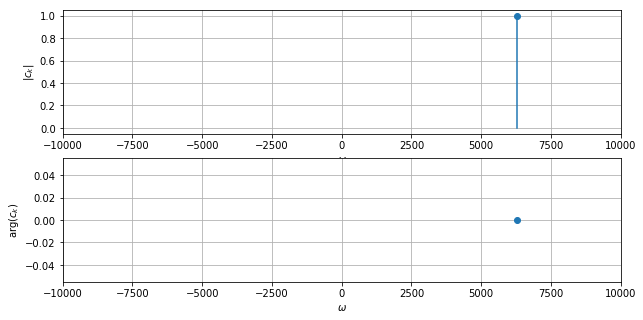

In [40]:
# pouze komplex exp ... 
_, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].stem([2000*np.pi],[1],basefmt=" ")  # nechci cervenou baseline ... 1 value to array ...
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xlim(-10000,10000)
ax[0].set_xlabel('$\omega$')
ax[0].grid()
ax[1].stem([2000*np.pi],[0],basefmt=" ")  # nechci cervenou baseline ...1 value to array ...
ax[1].set_ylabel('arg$(c_k)$')
ax[1].set_xlabel('$\omega$')
ax[1].set_xlim(-10000,10000)
ax[1].grid()
plt.savefig('FIG/cexp_raw_ck.pdf')

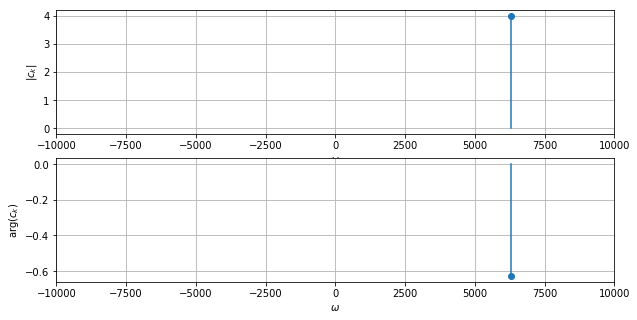

In [14]:
# pouzenecim nasobena komplex exp ... 
_, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].stem([2000*np.pi],[4],basefmt=" ")  # nechci cervenou baseline ... 1 value to array ...
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xlim(-10000,10000)
ax[0].set_xlabel('$\omega$')
ax[0].grid()
ax[1].stem([2000*np.pi],[-np.pi/5],basefmt=" ")  # nechci cervenou baseline ...1 value to array ...
ax[1].set_ylabel('arg$(c_k)$')
ax[1].set_xlabel('$\omega$')
ax[1].set_xlim(-10000,10000)
ax[1].grid()
plt.savefig('FIG/cexp_ck.pdf')

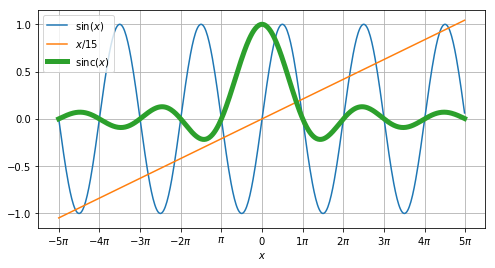

In [13]:
# -------sin cardinal ---------
x = np.arange(-5*np.pi, 5*np.pi,np.pi/50)
ysin = np.sin(x)
ysinc = np.sinc(x/np.pi)
plt.figure(figsize=(8,4))
plt.plot(x,ysin,label='$\sin(x)$') 
plt.plot(x,x/15,label='$x/15$') 
plt.plot(x,ysinc,label='sinc$(x)$', linewidth=5)

plt.gca().set_xlabel('$x$')
plt.gca().grid()
plt.gca().legend()
plt.gca().set_xticks(np.arange(-5*np.pi, 6*np.pi,np.pi))
plt.gca().set_xticklabels(['$-5\pi$', '$-4\pi$','$-3\pi$','$-2\pi$','$\pi$','$0$','$1\pi$','$2\pi$','$3\pi$','$4\pi$','$5\pi$'])

plt.savefig('FIG/sinc.pdf')   

In [17]:
# --- hrani 440 Hz ... 
import IPython
import soundfile as sf
fs = 16000
n = np.arange(0, 32000)  # 2 seconds
x = np.cos (2*np.pi*440 / fs * n)
IPython.display.display(IPython.display.Audio(x, rate=fs))

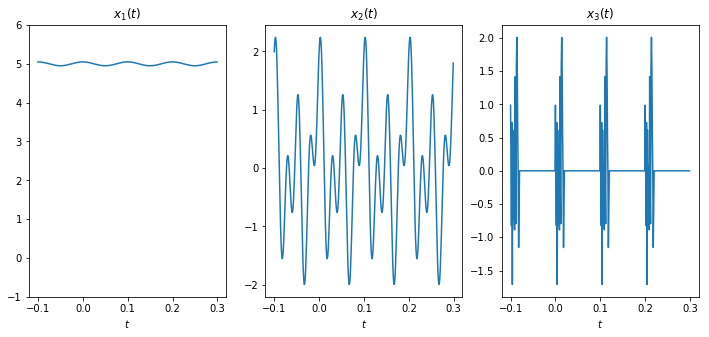

In [4]:
# --- pomale a rychle signaly --- 
T1 = 0.1
t = np.arange(-T1, 3*T1, T1/100)
x1 = 5 + 0.05*np.cos(2*np.pi/T1 * t)
x2 = 0.5*np.cos(2*np.pi/T1 * t) + np.cos(2*2*np.pi/T1 * t+ 0.3) + np.cos(4*2*np.pi/T1 * t- 1)
x3 = np.zeros(t.shape)
xaux = np.random.randn(1,20)
for ii in [0,100,200,300]:
  x3[ii:(ii+20)] = xaux
    
_, ax = plt.subplots(1,3, figsize=(12,5))
ax[0].plot(t,x1)
ax[0].set_ylim(-1,6)
ax[0].set_xlabel('$t$')
ax[0].set_title('$x_1(t)$')
ax[1].plot(t,x2)
ax[1].set_xlabel('$t$')
ax[1].set_title('$x_2(t)$')
ax[2].plot(t,x3)
ax[2].set_xlabel('$t$')
ax[2].set_title('$x_3(t)$')
plt.savefig('FIG/rychlost_signalu.pdf')   

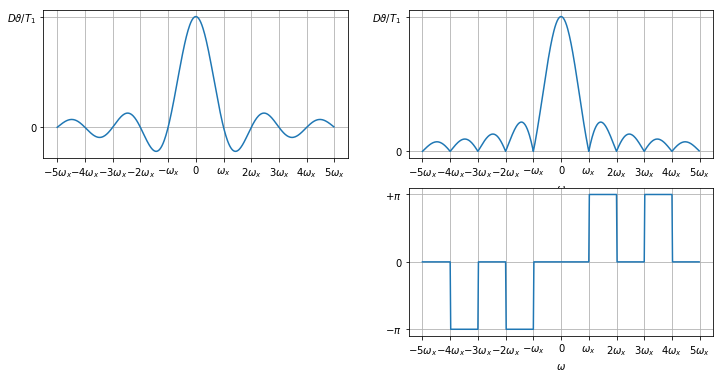

In [114]:
# --- kardinalni sin -> modul argument 
D =1 
om1 = 20 # won't plot it ... 
T1 = 2 * np.pi / om1
theta = 0.17
om_cross = 2 * np.pi / theta
om = np.arange(-5*om_cross, 5*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ... 
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]
omticks = np.arange(-5*om_cross, 6*om_cross, om_cross)
#omticklabels = ['$\frac{2\pi}{\vartheta}$']
omticklabels = ['$-5\omega_x$', '$-4\omega_x$','$-3\omega_x$','$-2\omega_x$','$-\omega_x$','0','$\omega_x$','$2\omega_x$','$3\omega_x$','$4\omega_x$','$5\omega_x$',]

_, ax = plt.subplots(2,2,figsize=(12,6))
ax[0,0].plot(om,rsinc)
ax[0,0].grid()
ax[0,0].set_xticks(omticks)
ax[0,0].set_xticklabels(omticklabels)
ax[0,0].set_yticks([0, D * theta / T1])
ax[0,0].set_yticklabels(['0', '$D \\vartheta / T_1$'])
ax[1,0].axis('off')
ax[0,1].plot(om,msinc)
ax[0,1].grid()
ax[0,1].set_xticks(omticks)
ax[0,1].set_xticklabels(omticklabels)
ax[0,1].set_yticks([0, D * theta / T1])
ax[0,1].set_yticklabels(['0', '$D \\vartheta / T_1$'])
ax[0,1].set_xlabel('$\omega$')

ax[1,1].plot(om,asinc)
ax[1,1].grid()
ax[1,1].set_xticks(omticks)
ax[1,1].set_xticklabels(omticklabels)
ax[1,1].set_yticks([-np.pi, 0 , np.pi])
ax[1,1].set_yticklabels(['$-\pi$', '0', '$+\pi$'])
ax[1,1].set_xlabel('$\omega$')

plt.savefig('FIG/sinc_real_modul_arg.pdf')   

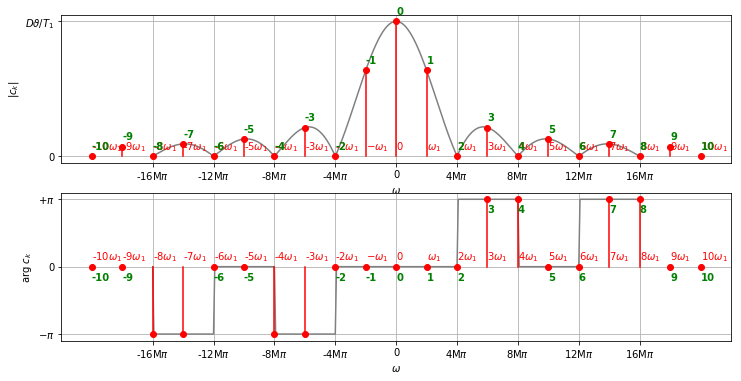

In [150]:
# now fill it with coefficients ... 
# generate some coeffs ... first a lot, then limit it as I'm lazy to calculate how many we should have ...
kmax = int(5 * om_cross / om1) 
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
ack = np.angle(ck)  # need the same trick ... 
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

# pekny vektor popisu ...
kom1text = list()
for ii in range(len(k)):
    kom1text.append (str(int(k[ii])) + "$\omega_1$")
# fixing 0, 1 and -1 ... 
kom1text[kmax] = '0'
kom1text[kmax+1] = "$\omega_1$"
kom1text[kmax-1] = "$-\omega_1$"
#print(kom1text)

_, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(om,msinc,color='gray')
ax[0].grid()
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)
ax[0].set_yticks([0, D * theta / T1])
ax[0].set_yticklabels(['0', '$D \\vartheta / T_1$'])
ax[0].stem(k*om1,mck,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(kom1text):
    ax[0].annotate(txt, (k[ii] * om1, D * theta / T1 / 20),color='r')
    ax[0].annotate(k[ii], (k[ii] * om1, mck[ii] + D * theta / T1 / 20),color='g',fontweight='bold')
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|c_k|$')
    
ax[1].plot(om,asinc,color='gray')
ax[1].grid()
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].set_yticks([-np.pi, 0 , np.pi])
ax[1].set_yticklabels(['$-\pi$', '0', '$+\pi$'])
ax[1].stem(k*om1,ack,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(kom1text):
    ax[1].annotate(txt, (k[ii] * om1, np.pi/10),color='r')
    ax[1].annotate(k[ii], (k[ii] * om1, ack[ii]-np.pi/5),color='g',fontweight='bold')
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $c_k$')

plt.savefig('FIG/ck_obd.pdf')   

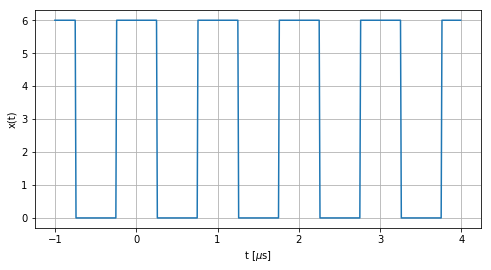

In [184]:
# pro priklad s 1 Mhz ... napred signal.
f1 = 1000000
T1 = 1/f1 
theta = T1 / 2
D = 6 
om1 = 2 * np.pi * f1 
om_cross = 2*np.pi / theta
t = np.arange(-T1,4*T1,T1/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
for ii in range(-1,4):
  x[indices+ii*100]=D
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)') 
plt.gca().grid()
plt.savefig('FIG/obd_1MHz.pdf')   

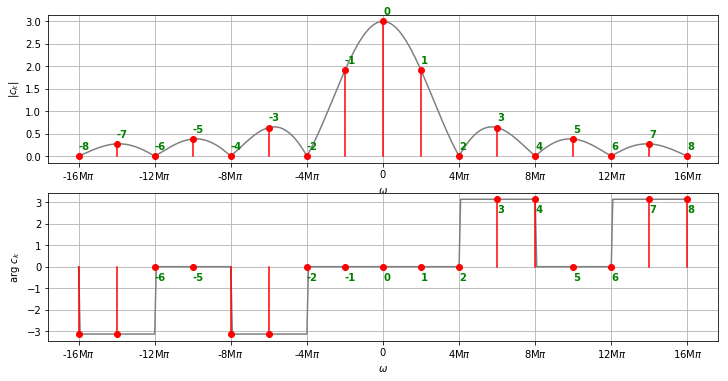

In [152]:
# a FR ... 
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ... 
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

kmax = int(4 * om_cross / om1) 
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
ack = np.angle(ck)  # need the same trick ... 
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

_, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(om,msinc,color='gray')
ax[0].grid()
ax[0].stem(k*om1,mck,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[0].annotate(k[ii], (k[ii] * om1, mck[ii] + D * theta / T1 / 20),color='g',fontweight='bold')
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)
    
ax[1].plot(om,asinc,color='gray')
ax[1].grid()
ax[1].stem(k*om1,ack,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[1].annotate(k[ii], (k[ii] * om1, ack[ii]-np.pi/5),color='g',fontweight='bold')
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $c_k$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)

plt.savefig('FIG/ck_obd_1MHz.pdf')   

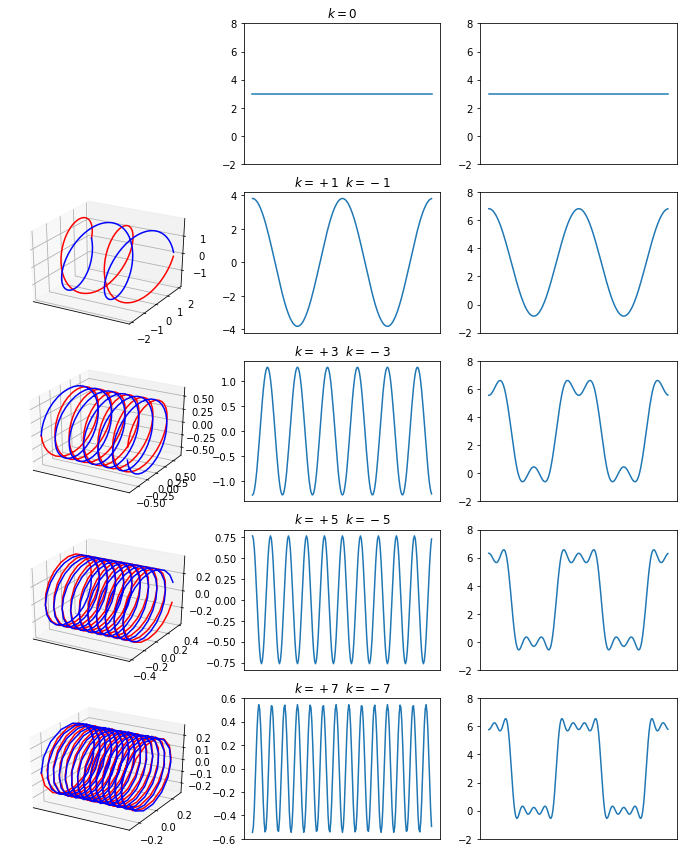

In [182]:
# ---- mega skladani - jen 3 periody ... budeme potrebovat komplexni barel ... 
# funkce pro komplexni drateny barel 
from mpl_toolkits import mplot3d

def complex_cylinder(t1, t2, r, fig):
    '''kresli sedy drateny valec ve 3d tak, aby byla dobre videt komplexni exponenciala. 
    t1 je pocatecni cas
    t2 je koncovy cas 
    r je polomer
    fig je obrazek'''
    phi = np.linspace(0,2 * np.pi,100)
    t = np.linspace(t1,t2,9)
    kolo = r * np.exp(1j * phi)
    for tt in t: 
        fig.plot3D(tt * np.ones(phi.shape), np.real(kolo), np.imag(kolo),color='k',alpha=0.1)
    phi = np.linspace(0,2 * np.pi,32)
    kolo = r * np.exp(1j * phi)
    for z in kolo:        
        line=art3d.Line3D(*zip((t1,np.real(z),np.imag(z)), (t2,np.real(z),np.imag(z))), markevery=(1, 1), color='k',alpha=0.1)
        ax.add_line(line)   
        
# definice casu a obrazku ...         
t = np.arange(-T1,T1,T1/100)
#_, ax = plt.subplots(5,3,figsize=(12,15))
timeticks=[]

fig = plt.figure(figsize=(12,15))

# first the special case - d.c.
xsynt = ck[kmax] * np.ones(t.size)
ax = fig.add_subplot(5, 3, 2) #, projection='3d')
ax.plot(t,xsynt)
ax.set_ylim(-2,8)
ax.set_xticks(timeticks)
ax.set_title('$k=$0')

ax = fig.add_subplot(5, 3, 3) #, projection='3d')
ax.plot(t,xsynt)
ax.set_ylim(-2,8)
ax.set_xticks(timeticks)

# ok, now go hard ... 
for ii,thisk in enumerate([1,3,5,7]):
    # complex exp ... 
    ax = fig.add_subplot(5, 3, (ii+1)*3 + 1, projection='3d')
    pexp = ck[kmax+thisk] * np.exp(1j * thisk * om1 * t)
    mexp = ck[kmax-thisk] * np.exp(-1j * thisk * om1 * t)
    ax.plot3D(t, np.real(pexp), np.imag(pexp),color='r')
    ax.plot3D(t, np.real(mexp), np.imag(mexp),color='b')
    ax.set_xticks([])
    # cos ... 
    thiscos = np.real(pexp + mexp) # np.real to be sure ... 
    ax = fig.add_subplot(5, 3, (ii+1)*3 + 2)
    ax.plot(t,thiscos)
    ax.set_xticks(timeticks)
    ax.set_title('$k=+$'+str(thisk)+'  $k=-$'+str(thisk))
    # cummulative sum ... 
    xsynt = xsynt + thiscos
    ax = fig.add_subplot(5, 3, (ii+1)*3 + 3)
    ax.plot(t,xsynt)
    ax.set_ylim(-2,8)
    ax.set_xticks(timeticks)
    
plt.savefig('FIG/obd_1MHz_synt.pdf') 

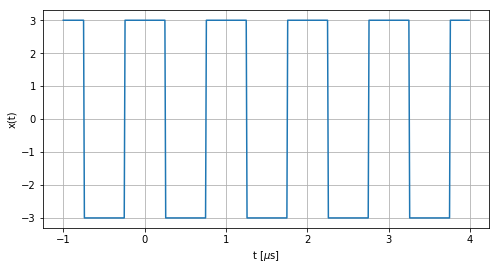

In [186]:
# ------------ jina ss slozka 
f1 = 1000000
T1 = 1/f1 
theta = T1 / 2
D = 6 
om1 = 2 * np.pi * f1 
om_cross = 2*np.pi / theta
t = np.arange(-T1,4*T1,T1/100)
x = -3*np.ones(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
for ii in range(-1,4):
  x[indices+ii*100]=3
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)') 
plt.gca().grid()
plt.savefig('FIG/obd_1MHz_ss0.pdf')   

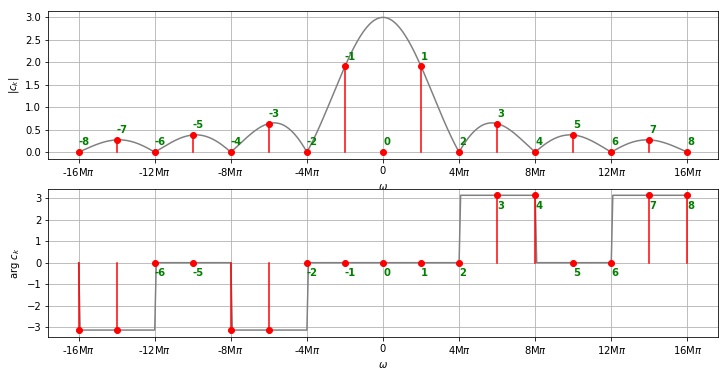

In [188]:
# a FR ... 
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ... 
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

kmax = int(4 * om_cross / om1) 
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
mck[kmax] = 0 #THIS is the only change 
ack = np.angle(ck)  # need the same trick ... 
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

_, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(om,msinc,color='gray')
ax[0].grid()
ax[0].stem(k*om1,mck,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[0].annotate(k[ii], (k[ii] * om1, mck[ii] + D * theta / T1 / 20),color='g',fontweight='bold')
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)
    
ax[1].plot(om,asinc,color='gray')
ax[1].grid()
ax[1].stem(k*om1,ack,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[1].annotate(k[ii], (k[ii] * om1, ack[ii]-np.pi/5),color='g',fontweight='bold')
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $c_k$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)

plt.savefig('FIG/ck_obd_1MHz_ss0.pdf')   

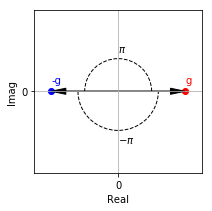

In [210]:
import matplotlib.patches as mpatches
z = 0.8
r = np.abs(z)
phi = np.angle(z)
plt.figure(figsize=(3,3))
plt.gca().set_ylim(-1,1)
plt.gca().set_xlim(-1,1)
plt.gca().scatter(np.real(z),np.imag(z),color='r')
plt.gca().arrow(0, 0, np.real(z),np.imag(z), head_width=0.3/4, head_length=0.7/4, length_includes_head=True, fc='black', ec='black')
z = -z
plt.gca().scatter(np.real(z),np.imag(z),color='b')
plt.gca().arrow(0, 0, np.real(z),np.imag(z), head_width=0.3/4, head_length=0.7/4, length_includes_head=True, fc='black', ec='black')
pac = mpatches.Arc([0, 0], r, r, angle=0, theta1=0, theta2=180, linestyle='--')
plt.gca().add_patch(pac)
pac = mpatches.Arc([0, 0], 1.2*r, 1.2*r, angle=0, theta1=180, theta2 = 0, linestyle='--')
plt.gca().add_patch(pac)
plt.gca().set_xticks([0])
plt.gca().set_yticks([0])
plt.gca().annotate('g', (r, 0.1),color='r')
plt.gca().annotate('-g', (-r, 0.1),color='b')
plt.gca().annotate('$\pi$', (0, 0.6*r))
plt.gca().annotate('$-\pi$', (0, -0.8*r))

plt.gca().grid()
plt.gca().set_xlabel('Real')
plt.gca().set_ylabel('Imag')
plt.savefig('FIG/plusminus.pdf')

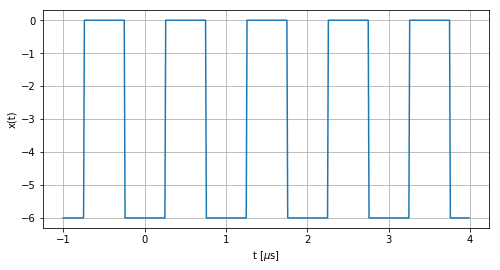

In [213]:
# ------------ minus 
f1 = 1000000
T1 = 1/f1 
theta = T1 / 2
D = 6 
om1 = 2 * np.pi * f1 
om_cross = 2*np.pi / theta
t = np.arange(-T1,4*T1,T1/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
for ii in range(-1,4):
  x[indices+ii*100]=-6
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)') 
plt.gca().grid()
plt.savefig('FIG/obd_1MHz_minus.pdf')   

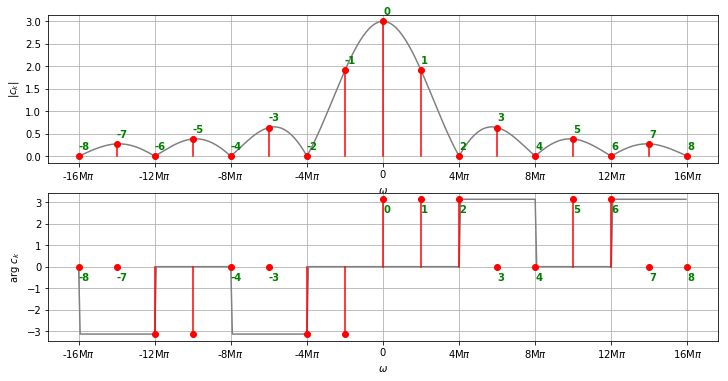

In [212]:
# a FR ... 
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ... 
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

kmax = int(4 * om_cross / om1) 
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = -D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
ack = np.angle(ck)  # need the same trick ... 
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

_, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(om,msinc,color='gray')
ax[0].grid()
ax[0].stem(k*om1,mck,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[0].annotate(k[ii], (k[ii] * om1, mck[ii] + D * theta / T1 / 20),color='g',fontweight='bold')
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)
    
ax[1].plot(om,asinc,color='gray')
ax[1].grid()
ax[1].stem(k*om1,ack,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[1].annotate(k[ii], (k[ii] * om1, ack[ii]-np.pi/5),color='g',fontweight='bold')
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $c_k$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)

plt.savefig('FIG/ck_obd_1MHz_minus.pdf')

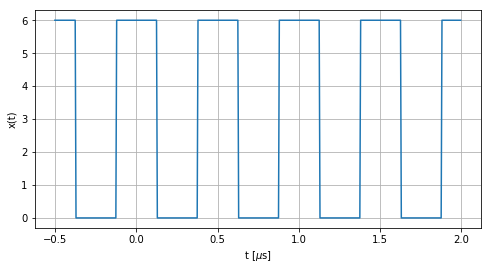

In [215]:
# ------------ 2x faster 
f1 = 2000000
T1 = 1/f1 
theta = T1 / 2
D = 6 
om1 = 2 * np.pi * f1 
om_cross = 2*np.pi / theta
t = np.arange(-T1,4*T1,T1/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
for ii in range(-1,4):
  x[indices+ii*100]=6
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)') 
plt.gca().grid()
plt.savefig('FIG/obd_1MHz_2xfaster.pdf')   

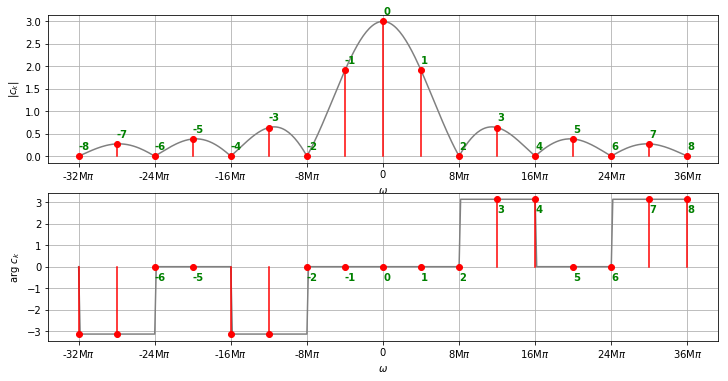

In [217]:
# a FR ... 
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ... 
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

kmax = int(4 * om_cross / om1) 
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
ack = np.angle(ck)  # need the same trick ... 
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-32M$\pi$', '-24M$\pi$', '-16M$\pi$', '-8M$\pi$', '0', '8M$\pi$', '16M$\pi$', '24M$\pi$', '36M$\pi$' ]

_, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(om,msinc,color='gray')
ax[0].grid()
ax[0].stem(k*om1,mck,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[0].annotate(k[ii], (k[ii] * om1, mck[ii] + D * theta / T1 / 20),color='g',fontweight='bold')
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)
    
ax[1].plot(om,asinc,color='gray')
ax[1].grid()
ax[1].stem(k*om1,ack,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[1].annotate(k[ii], (k[ii] * om1, ack[ii]-np.pi/5),color='g',fontweight='bold')
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $c_k$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)

plt.savefig('FIG/ck_obd_1MHz_2xfaster.pdf')

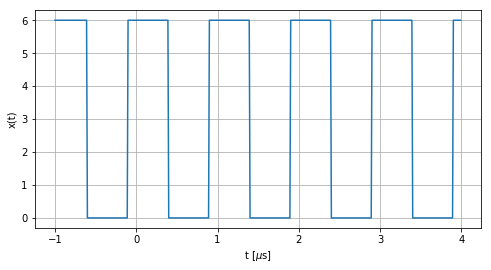

In [226]:
# ------------ posun  
f1 = 1000000
T1 = 1/f1 
theta = T1 / 2
D = 6 
om1 = 2 * np.pi * f1 
om_cross = 2*np.pi / theta
t = np.arange(-T1,4*T1,T1/100)
x = np.zeros(t.size)
indices = np.argwhere( (t > (-theta/2+T1/7)) & (t < (+theta/2+T1/7)))
for ii in range(-1,4):
  x[indices+ii*100]=6
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)') 
plt.gca().grid()
plt.savefig('FIG/obd_1MHz_posun.pdf')   

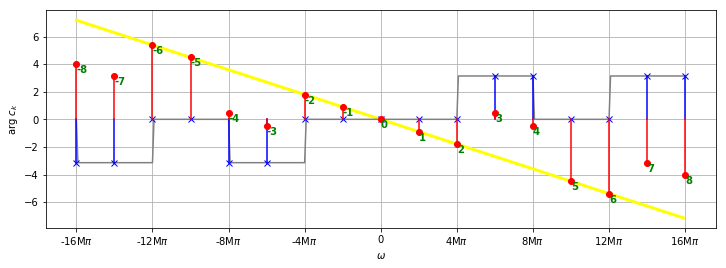

In [242]:
# a FR ... 
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ... 
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

kmax = int(4 * om_cross / om1) 
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
ack = np.angle(ck)  # need the same trick ... 
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

#--- here the new ones --- 
tau = T1 / 7
acky = ack - tau * om1 * k 

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

plt.figure(figsize=(12,4))
ax = plt.gca()
#  pomocnou caru ... 
auxarg = -tau * om
ax.plot(om,auxarg,color='yellow',linewidth=3)
ax.plot(om,asinc,color='gray')
ax.grid()
ax.stem(k*om1,ack,basefmt=" ",linefmt='b',markerfmt='bx')
ax.stem(k*om1,acky,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax.annotate(k[ii], (k[ii] * om1, acky[ii]-np.pi/5),color='g',fontweight='bold')
ax.set_xlabel('$\omega$')
ax.set_ylabel('arg $c_k$')
ax.set_xticks(omticks)
ax.set_xticklabels(omticklabels)


plt.savefig('FIG/ck_obd_1MHz_posun.pdf')   

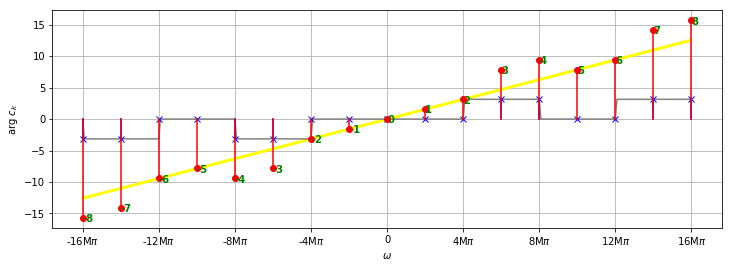

In [244]:
# a FR ... opacny posun = predbehnuti 
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ... 
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

kmax = int(4 * om_cross / om1) 
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
ack = np.angle(ck)  # need the same trick ... 
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

#--- here the new ones --- 
tau = T1 / 4
acky = ack + tau * om1 * k 

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

plt.figure(figsize=(12,4))
ax = plt.gca()
#  pomocnou caru ... 
auxarg = tau * om
ax.plot(om,auxarg,color='yellow',linewidth=3)
ax.plot(om,asinc,color='gray')
ax.grid()
ax.stem(k*om1,ack,basefmt=" ",linefmt='b',markerfmt='bx')
ax.stem(k*om1,acky,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax.annotate(k[ii], (k[ii] * om1, acky[ii]-np.pi/5),color='g',fontweight='bold')
ax.set_xlabel('$\omega$')
ax.set_ylabel('arg $c_k$')
ax.set_xticks(omticks)
ax.set_xticklabels(omticklabels)


plt.savefig('FIG/ck_obd_1MHz_predbeh.pdf')   

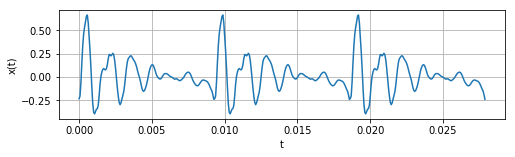

In [293]:
# ----------------- zvuk 
import IPython
import soundfile as sf
data, fs = sf.read('xx.wav')
IPython.display.display(IPython.display.Audio(data, rate=fs))

N = 149
#--- vyber pro pocitani a pro visualisaci 
x = data[0:N]
x3 = data[0:3*N]
n = np.arange(0,3*N)
t = n / fs   # spravna casova osa 

plt.figure(figsize=(8,2))
plt.plot(t,x3)
plt.gca().set_xlabel('t')
plt.gca().set_ylabel('x(t)') 
plt.gca().grid()
plt.savefig('FIG/a_orig.pdf')   

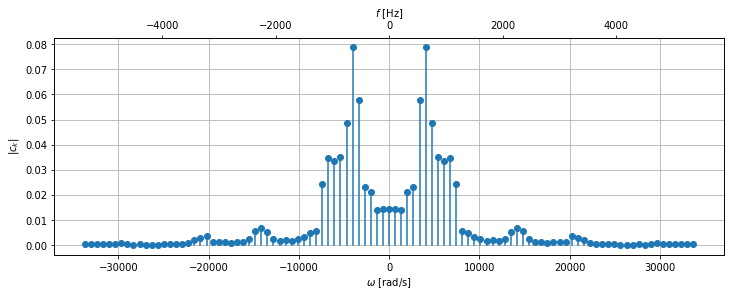

In [305]:
# -- koeficienty FR 
T1 = N / fs
f1 = 1 / T1 
om1 = 2 * np.pi / T1
X = np.fft.fftshift(np.fft.fft(x)) 
k0 = int((N-1)/ 2)  # pozor, funguje jen pro liche N !
kall=np.arange(-50,51)
omall = kall * om1
ckall = X[kall + k0] / N 

fig, ax = plt.subplots(figsize=(12,4))
ax.stem(omall, np.abs(ckall),basefmt=" ")
ax.set_xlabel('$\omega$ [rad/s]')
ax.set_ylabel('$|c_k|$') 
ax.grid()
(minom,maxom)=ax.get_xlim()
#def rads_to_Hz(x):
#    return x / 2 / np.pi

secax = ax.twiny()
secax.set_xlim(minom / 2 / np.pi, maxom / 2 / np.pi)
secax.set_xlabel('$f$ [Hz]')
fig.savefig('FIG/a_ck.pdf')   

xx1_5.wav


xx6_10.wav


xx11_15.wav


xx16_20.wav


xx21_25.wav


xx26_30.wav


xx31_35.wav


xx36_40.wav


xx41_45.wav


xx46_50.wav


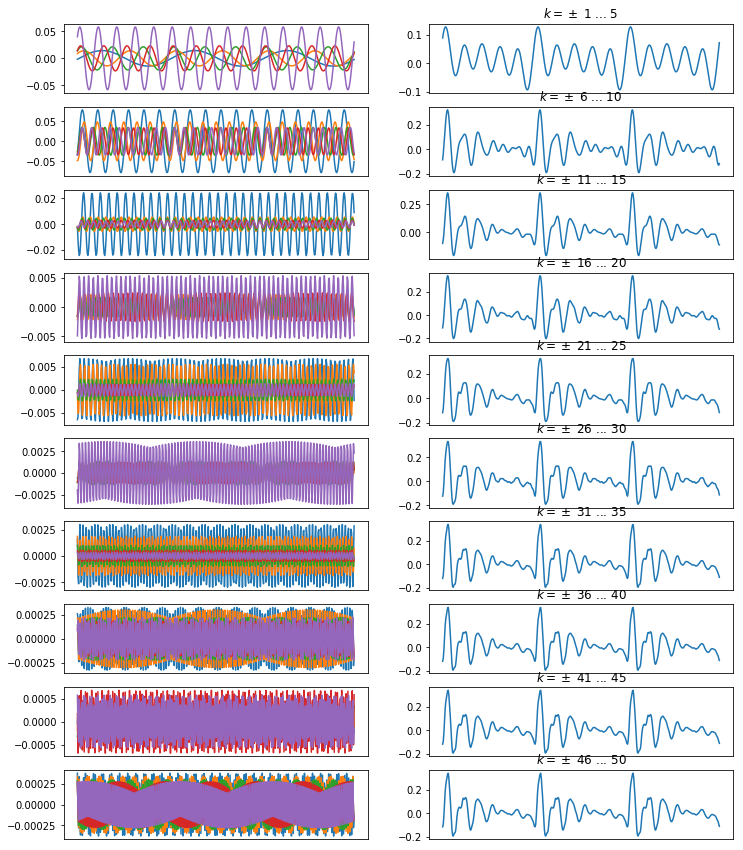

In [317]:
# ---- mega skladani - recoveho signalu jen 3 periody pro visualisaci, 50 pro hrani, komplex exp uz ne.  
# definice casu a obrazku ...  
#t - uz je ddefinovan 
tplay = n = np.arange(0,50*N) / fs 
kmax = 50

_, ax = plt.subplots(10,2,figsize=(12,15))

# initialization -- first the special case - d.c.
yshow = ckall[kmax] * np.ones(t.size)
yplay = ckall[kmax] * np.ones(tplay.size)

for fivetuple in range(0,10):  # takze do 10 ti ... 
    startk = fivetuple * 5 + 1
    endk = startk + 5  # this is too much but range will handle it ... 
    for k in range(startk, endk):
        #print(k)
        Ck = np.abs(ckall[kmax + k])
        phik = np.angle(ckall[kmax + k])
        xshow = Ck * np.cos(k * om1 * t + phik)
        xplay = Ck * np.cos(k * om1 * tplay + phik)
        yshow = yshow + xshow
        yplay = yplay + xplay
        ax[fivetuple,0].plot(t,xshow)
        ax[fivetuple,0].set_xticks([])
    wavfname = "xx"+str(startk)+"_"+str(endk-1)+".wav"
    print(wavfname)
    ax[fivetuple,1].plot(t,yshow)    
    ax[fivetuple,1].set_xticks([])
    ax[fivetuple,1].set_title('$k=\pm$ '+str(startk)+" ... "+str(endk-1))
    IPython.display.display(IPython.display.Audio(yplay, rate=fs))
    sf.write(wavfname, np.real(yplay), fs)

#ax.set_xticks(timeticks)
   
plt.savefig('FIG/a_synt.pdf') 